In [1]:
import numpy as np
from PIL import Image
from pathlib import Path
import collections 
from itertools import chain
import itertools
import pandas as pd
import matplotlib.pyplot as plt


folder =r"C:\Users\danie\Desktop\Training_ML\T"

In [2]:
predict = r"C:\Users\danie\Desktop\ML - Yes Photos\1950s_sharon_childhood_0011_a.jpg"

In [3]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    
    bw=img.convert('L')
    color = np.asarray(img)
    BW = np.asarray(bw)
    BW = BW[:,:,np.newaxis]
    photo = np.dstack((BW, color))
    
    flat= np.array(photo).ravel()
    
    it=iter(flat)
    tuple_list= list(zip(it, it, it, it))
    return tuple_list
    
    #zipper=zip(BWflat, RGB_array)
    #image_dictionary=dict(zipper)
    #return image_dictionary

In [4]:
def dictionary_folder(image_folder):   
    images = Path(image_folder).glob('*.jpg')

    list_of_files = []
    for image in images:
        list_of_files.append(str(image))
        
    list_of_all_tuples = []
        
    for image in list_of_files:
        print("one photo!")
        
        one_photo_tuple = load_image(image)
        list_of_all_tuples.append(one_photo_tuple)
        
    return list_of_all_tuples

In [5]:
def make_color_chart(list_of_all_tuples):
    merge=list(itertools.chain(*list_of_all_tuples))
    print("merged", len(merge), " tuples!")
    
    df = pd.DataFrame(merge, columns=['Grey Pixel', 'R', 'G', 'B'])
    df = df.groupby(['Grey Pixel','R','G','B']).size().reset_index(name='Count')
    df = df.sort_values(["Count"], ascending=False)
    df = df.drop_duplicates(subset=["Grey Pixel"], keep="first")
    df = df.sort_values(["Grey Pixel"], ascending=True)
    df = df.drop(columns = ["Count"])
    
    print("dataframed!")
    
    color_chart = df.to_numpy()
    cc = color_chart.tolist()
    dict_color_chart = {}
    print("charted!")

    for line in cc:
        key, value = line[0], line[1:]
        dict_color_chart[key] = value
    return dict_color_chart
    

In [6]:
def run_model(image_path, model):
    test = Image.open(image_path)
    test.load()
    
    bw=test.convert('L')
    BW = np.asarray(bw)
    shape = BW.shape
    flat= np.array(BW).ravel()
    
    RGB_list = []
    
    l = [model[i] for i in flat]
    
    r, g, b = map(list, zip(*l))
    
    R_array = np.array(r)
    G_array = np.array(g)
    B_array = np.array(b)

    R_array = np.reshape(R_array, shape)
    G_array = np.reshape(G_array, shape)
    B_array = np.reshape(B_array, shape)

    R_channel = R_array[:,:,np.newaxis]
    G_channel = G_array[:,:,np.newaxis]
    B_channel = B_array[:,:,np.newaxis]

    colorized = np.dstack((R_channel, G_channel, B_channel))
    return colorized

In [7]:
tuples = dictionary_folder(folder)

one photo!
one photo!
one photo!
one photo!
one photo!
one photo!
one photo!
one photo!
one photo!
one photo!
one photo!
one photo!


In [8]:
model = make_color_chart(tuples)

merged 16558440  tuples!
dataframed!
charted!


In [9]:
tested = run_model(predict, model)

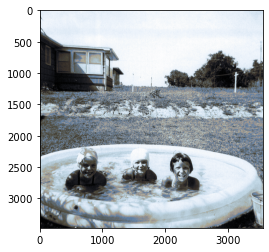

In [10]:
plt.imshow(tested)